In [1]:
import numpy as np
import pandas as pd
import glob,os
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# allow us to view all the columns available
pd.set_option('display.max_rows', 20000)
pd.set_option('display.max_columns', 1000)

In [2]:
data = pd.read_csv('Bank_CS.csv')
df = data.copy()
df = df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

In [3]:
df.shape

(2350, 21)

In [4]:
df.head(5)

,Credit_Card_Exceed_Months,Employment_Type,Loan_Amount,Loan_Tenure_Year,More_Than_One_Products,Credit_Card_types,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,Number_of_Bank_Products,Number_of_Loan_to_Approve,Property_Type,Years_for_Property_to_Completion,State,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Decision,Score
0,1,employer,NaN,16.0,yes,platinum,2,5.0,2.0,2.0,1.0,1,condominium,10.0,Johor,2.0,12262.0,853141.0,16025.0,Reject,7
1,1,employer,605505.0,19.0,no,normal,2,NaN,2.0,2.0,1.0,2,NaN,10.0,Johor,2.0,9251.0,882901.0,17082.0,Accept,9
2,1,employer,NaN,NaN,yes,normal,2,5.0,2.0,2.0,NaN,3,condominium,10.0,Johor,NaN,4919.0,540489.0,12613.0,Reject,8
3,1,employer,490216.0,NaN,no,normal,2,5.0,NaN,2.0,1.0,1,condominium,10.0,Johor,NaN,4459.0,536727.0,10952.0,Accept,9
4,1,employer,292728.0,14.0,yes,normal,2,5.0,2.0,2.0,1.0,2,condominium,10.0,Johor,3.0,5628.0,774695.0,NaN,Reject,8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 21 columns):
Credit_Card_Exceed_Months            2350 non-null int64
Employment_Type                      2350 non-null object
Loan_Amount                          1818 non-null float64
Loan_Tenure_Year                     1898 non-null float64
More_Than_One_Products               2350 non-null object
Credit_Card_types                    2208 non-null object
Number_of_Dependents                 2350 non-null int64
Years_to_Financial_Freedom           1703 non-null float64
Number_of_Credit_Card_Facility       1709 non-null float64
Number_of_Properties                 1525 non-null float64
Number_of_Bank_Products              1615 non-null float64
Number_of_Loan_to_Approve            2350 non-null int64
Property_Type                        2156 non-null object
Years_for_Property_to_Completion     1920 non-null float64
State                                2350 non-null object
Number_of_Side_Inco

# Exploratory Data Analysis and Data Pre-processing

## Data Pre-processing

### Checking cleanliness of data

In [6]:
objectType = df.select_dtypes(include=['object']).copy()
numType = df.select_dtypes(include=['float64','int64']).copy()

In [7]:
#lowering case of df for all object type
for i,col in enumerate(objectType):
    df[col] = df[col].str.lower()

In [8]:
for i,col in enumerate(objectType):
    print(col + ' : '  + str(objectType[col].unique()))

Employment_Type : ['employer' 'Self_Employed' 'government' 'employee' 'Fresh_Graduate']
More_Than_One_Products : ['yes' 'no']
Credit_Card_types : ['platinum' 'normal' 'gold' nan]
Property_Type : ['condominium' nan 'bungalow' 'terrace' 'flat']
State : ['Johor' 'Selangor' 'Kuala Lumpur' 'Penang' 'P.Pinang' 'Pulau Penang'
 'Johor B' 'K.L' 'N.Sembilan' 'N.S' 'Sarawak' 'Sabah' 'SWK' 'Trengganu'
 'Kedah']
Decision : ['Reject' 'Accept']


<br> 'States' have multiple representation which needs to be cleaned. 

In [9]:
df['State'] = df['State'].replace(dict.fromkeys(['johor','johor b'], 'Johor'))
df['State'] = df['State'].replace(dict.fromkeys(['selangor'], 'Selangor'))
df['State'] = df['State'].replace(dict.fromkeys(['kuala lumpur','k.l'], 'Kuala Lumpur'))
df['State'] = df['State'].replace(dict.fromkeys(['penang','p.pinang','pulau penang'], 'Penang'))
df['State'] = df['State'].replace(dict.fromkeys(['n.sembilan','n.s'], 'Negeri Sembilan'))
df['State'] = df['State'].replace(dict.fromkeys(['sarawak','swk'], 'Sarawak'))
df['State'] = df['State'].replace(dict.fromkeys(['sabah'], 'Sabah'))
df['State'] = df['State'].replace(dict.fromkeys(['kedah'], 'Kedah'))
df['State'] = df['State'].replace(dict.fromkeys(['trengganu'], 'Terengganu'))

In [10]:
for col in objectType.columns:
    print(col + ' : '  + str(df[col].unique()))

Employment_Type : ['employer' 'self_employed' 'government' 'employee' 'fresh_graduate']
More_Than_One_Products : ['yes' 'no']
Credit_Card_types : ['platinum' 'normal' 'gold' nan]
Property_Type : ['condominium' nan 'bungalow' 'terrace' 'flat']
State : ['Johor' 'Selangor' 'Kuala Lumpur' 'Penang' 'Negeri Sembilan' 'Sarawak'
 'Sabah' 'Terengganu' 'Kedah']
Decision : ['reject' 'accept']


In [11]:
for i,col in enumerate(numType):
    print(col + ' : '  + str(numType[col].unique()))

Credit_Card_Exceed_Months : [1 6 2 7 3 4 5]
Loan_Amount : [    nan 605505. 490216. ... 517303. 339461. 321921.]
Loan_Tenure_Year : [16. 19. nan 14. 21. 24. 12. 22. 10. 23. 20. 13. 18. 15. 11. 17.]
Number_of_Dependents : [2 3 4 5 6]
Years_to_Financial_Freedom : [ 5. nan  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Number_of_Credit_Card_Facility : [ 2. nan  6.  5.  4.  3.]
Number_of_Properties : [ 2. nan  3.  4.  5.]
Number_of_Bank_Products : [ 1. nan  2.  3.  5.  4.]
Number_of_Loan_to_Approve : [1 2 3]
Years_for_Property_to_Completion : [10. nan 11. 12. 13.]
Number_of_Side_Income : [ 2. nan  3.  1.]
Monthly_Salary : [12262.  9251.  4919. ... 11971.  5011.  9884.]
Total_Sum_of_Loan : [ 853141.  882901.  540489. ... 1147984.  685580.  673748.]
Total_Income_for_Join_Application : [16025. 17082. 12613. ... 15349. 11842. 13892.]
Score : [7 9 8 6]


In [12]:
df.head(5)

,Credit_Card_Exceed_Months,Employment_Type,Loan_Amount,Loan_Tenure_Year,More_Than_One_Products,Credit_Card_types,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,Number_of_Bank_Products,Number_of_Loan_to_Approve,Property_Type,Years_for_Property_to_Completion,State,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Decision,Score
0,1,employer,NaN,16.0,yes,platinum,2,5.0,2.0,2.0,1.0,1,condominium,10.0,Johor,2.0,12262.0,853141.0,16025.0,reject,7
1,1,employer,605505.0,19.0,no,normal,2,NaN,2.0,2.0,1.0,2,NaN,10.0,Johor,2.0,9251.0,882901.0,17082.0,accept,9
2,1,employer,NaN,NaN,yes,normal,2,5.0,2.0,2.0,NaN,3,condominium,10.0,Johor,NaN,4919.0,540489.0,12613.0,reject,8
3,1,employer,490216.0,NaN,no,normal,2,5.0,NaN,2.0,1.0,1,condominium,10.0,Johor,NaN,4459.0,536727.0,10952.0,accept,9
4,1,employer,292728.0,14.0,yes,normal,2,5.0,2.0,2.0,1.0,2,condominium,10.0,Johor,3.0,5628.0,774695.0,NaN,reject,8


### Setting Categorical and Numerical data

In [13]:
continuous = ['Loan_Amount','Monthly_Salary','Total_Sum_of_Loan','Total_Income_for_Join_Application']
categorical = [col for col in df.columns if col not in continuous]

In [14]:
df[continuous].head(5)

,Loan_Amount,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application
0,NaN,12262.0,853141.0,16025.0
1,605505.0,9251.0,882901.0,17082.0
2,NaN,4919.0,540489.0,12613.0
3,490216.0,4459.0,536727.0,10952.0
4,292728.0,5628.0,774695.0,NaN


In [15]:
df[categorical].head(5)

,Credit_Card_Exceed_Months,Employment_Type,Loan_Tenure_Year,More_Than_One_Products,Credit_Card_types,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,Number_of_Bank_Products,Number_of_Loan_to_Approve,Property_Type,Years_for_Property_to_Completion,State,Number_of_Side_Income,Decision,Score
0,1,employer,16.0,yes,platinum,2,5.0,2.0,2.0,1.0,1,condominium,10.0,Johor,2.0,reject,7
1,1,employer,19.0,no,normal,2,NaN,2.0,2.0,1.0,2,NaN,10.0,Johor,2.0,accept,9
2,1,employer,NaN,yes,normal,2,5.0,2.0,2.0,NaN,3,condominium,10.0,Johor,NaN,reject,8
3,1,employer,NaN,no,normal,2,5.0,NaN,2.0,1.0,1,condominium,10.0,Johor,NaN,accept,9
4,1,employer,14.0,yes,normal,2,5.0,2.0,2.0,1.0,2,condominium,10.0,Johor,3.0,reject,8


### Checking the percentage of missing values

In [16]:
nulls = df.columns[df.isna().any()].tolist()

for i,col in enumerate(nulls):
    print('Percent of missing ' + col + ' records is ' + str((df[col].isnull().sum()/df.shape[0])*100) + '%' )

Percent of missing Loan_Amount records is 22.638297872340427%
Percent of missing Loan_Tenure_Year records is 19.23404255319149%
Percent of missing Credit_Card_types records is 6.042553191489362%
Percent of missing Years_to_Financial_Freedom records is 27.53191489361702%
Percent of missing Number_of_Credit_Card_Facility records is 27.276595744680854%
Percent of missing Number_of_Properties records is 35.1063829787234%
Percent of missing Number_of_Bank_Products records is 31.27659574468085%
Percent of missing Property_Type records is 8.25531914893617%
Percent of missing Years_for_Property_to_Completion records is 18.29787234042553%
Percent of missing Number_of_Side_Income records is 31.106382978723406%
Percent of missing Monthly_Salary records is 22.680851063829788%
Percent of missing Total_Sum_of_Loan records is 12.0%
Percent of missing Total_Income_for_Join_Application records is 39.148936170212764%


In [17]:
df = df.drop_duplicates()

### KNN Imputing

Since   **KNN Imputing** can only work on numerical values, we need to first encode the object datatypes.

In [18]:
from fancyimpute import KNN

In [19]:
objectDf = df.select_dtypes(include=['object']).copy()
objectCols = objectDf.columns

In [20]:
from sklearn.preprocessing import OrdinalEncoder

tempEncoded = df.copy()
encoder = OrdinalEncoder()
imputer = KNN()
# List of encoder object
encoderList = []
for col in objectCols:
    #retains only non-null values
    nonulls = np.array(tempEncoded[col].dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #print(impute_reshape)
    #encode date
    encoder = OrdinalEncoder()
    encoder.fit(impute_reshape)
    encoderList.append(encoder)
    #print(encoder.categories_)
    impute_ordinal = encoder.transform(impute_reshape)
    #encoderCategories.append(encoder.categories_)
    #Assign back encoded values to non-null values
    tempEncoded[col].loc[tempEncoded[col].notnull()] = np.squeeze(impute_ordinal)

C:\Users\ngjin\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\ngjin\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\ngjin\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se

In [21]:
tempEncoded.head()

,Credit_Card_Exceed_Months,Employment_Type,Loan_Amount,Loan_Tenure_Year,More_Than_One_Products,Credit_Card_types,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,Number_of_Bank_Products,Number_of_Loan_to_Approve,Property_Type,Years_for_Property_to_Completion,State,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Decision,Score
0,1,1,NaN,16.0,1,2,2,5.0,2.0,2.0,1.0,1,1,10.0,0,2.0,12262.0,853141.0,16025.0,1,7
1,1,1,605505.0,19.0,0,1,2,NaN,2.0,2.0,1.0,2,NaN,10.0,0,2.0,9251.0,882901.0,17082.0,0,9
2,1,1,NaN,NaN,1,1,2,5.0,2.0,2.0,NaN,3,1,10.0,0,NaN,4919.0,540489.0,12613.0,1,8
3,1,1,490216.0,NaN,0,1,2,5.0,NaN,2.0,1.0,1,1,10.0,0,NaN,4459.0,536727.0,10952.0,0,9
4,1,1,292728.0,14.0,1,1,2,5.0,2.0,2.0,1.0,2,1,10.0,0,3.0,5628.0,774695.0,NaN,1,8


We will impute the missing values here.

In [22]:
tempEncoded = pd.DataFrame(np.round(imputer.fit_transform(tempEncoded)),columns = tempEncoded.columns)

Imputing row 1/2350 with 1 missing, elapsed time: 10.581
Imputing row 101/2350 with 4 missing, elapsed time: 10.634
Imputing row 201/2350 with 2 missing, elapsed time: 10.673
Imputing row 301/2350 with 4 missing, elapsed time: 10.708
Imputing row 401/2350 with 3 missing, elapsed time: 10.744
Imputing row 501/2350 with 2 missing, elapsed time: 10.773
Imputing row 601/2350 with 1 missing, elapsed time: 10.814
Imputing row 701/2350 with 2 missing, elapsed time: 10.863
Imputing row 801/2350 with 4 missing, elapsed time: 10.899
Imputing row 901/2350 with 2 missing, elapsed time: 10.948
Imputing row 1001/2350 with 2 missing, elapsed time: 10.992
Imputing row 1101/2350 with 4 missing, elapsed time: 11.053
Imputing row 1201/2350 with 3 missing, elapsed time: 11.128
Imputing row 1301/2350 with 2 missing, elapsed time: 11.197
Imputing row 1401/2350 with 4 missing, elapsed time: 11.272
Imputing row 1501/2350 with 4 missing, elapsed time: 11.384
Imputing row 1601/2350 with 4 missing, elapsed time:

Now, we can convert our temporary encoded dataframe into a complete one.

In [23]:
filledDf = tempEncoded.copy()
for i,col in enumerate(objectCols):
  filledDf[col] = filledDf[col].astype(object)
  filledDf[col] = encoderList[i].inverse_transform(np.array(tempEncoded[col]).reshape(-1,1))

In [24]:
#for cat in categorical: 
#  col = cat.rsplit('_',1)
#  filledDf[cat] = filledDf[cat].astype(str) + '_' + col[-1]

### Binning Numerical Data

In [25]:
# Binning Joined Salary 
bins = [0,11627.75,15497.75,20000]
groups = ["Low_Joined",'Medium_Joined',"High_Joined"]
filledDf['Joined_Income_Binned'] = pd.cut(filledDf['Total_Income_for_Join_Application'], bins,labels=groups)
filledDf['Joined_Income_Binned'] = filledDf['Joined_Income_Binned'].astype(object)

# Binning Salary
bins = [0,6095.75,9908.75,12562.00]
groups = ["Low_Income",'Medium_Income',"High_Income"]
filledDf['Income_Binned'] = pd.cut(filledDf['Monthly_Salary'], bins,labels=groups)
filledDf['Income_Binned'] = filledDf['Income_Binned'].astype(object)

#Binning Loan Amount
bins = [0,305179.50,586650.25,799628.00]
groups = ["Small_Loan",'Medium_Loan',"High_Loan"]
filledDf['Loan_Amount_Binned'] = pd.cut(filledDf['Loan_Amount'], bins,labels=groups)
filledDf['Loan_Amount_Binned'] = filledDf['Loan_Amount_Binned'].astype(object)

#Binning Total Sum Of Loan
bins = [0,727947.2, 1176512 ,	1500000]
groups = ["Small_Loan_Sum",'Medium_Loan_Sum',"High_Loan_Sum"]
filledDf['Total_Loan_Sum_Binned'] = pd.cut(filledDf['Total_Sum_of_Loan'], bins,labels=groups)
filledDf['Total_Loan_Sum_Binned'] = filledDf['Total_Loan_Sum_Binned'].astype(object)

# Adding categorical columns to the categorical list
categorical = [col for col in filledDf.columns if col not in continuous]

Remember, now we need to convert all our categorical types to object datatype and encode them, because if we convert them before, NaN type values will be treated as another class. We dont want that.

In [26]:
for cat in categorical:
  filledDf[cat] = filledDf[cat].astype(object)

### Rearranging columns

In [27]:
cols = list(filledDf.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('Decision'))
for con in continuous:
  cols.pop(cols.index(con))
filledDf = filledDf[cols+ continuous +['Decision']]

In [28]:
filledDf.head(5)

,Credit_Card_Exceed_Months,Employment_Type,Loan_Tenure_Year,More_Than_One_Products,Credit_Card_types,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,Number_of_Bank_Products,Number_of_Loan_to_Approve,Property_Type,Years_for_Property_to_Completion,State,Number_of_Side_Income,Score,Joined_Income_Binned,Income_Binned,Loan_Amount_Binned,Total_Loan_Sum_Binned,Loan_Amount,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Decision
0,1,employer,16,yes,platinum,2,5,2,2,1,1,condominium,10,Johor,2,7,High_Joined,High_Income,Small_Loan,Medium_Loan_Sum,265419.0,12262.0,853141.0,16025.0,reject
1,1,employer,19,no,normal,2,15,2,2,1,2,condominium,10,Johor,2,9,High_Joined,Medium_Income,High_Loan,Medium_Loan_Sum,605505.0,9251.0,882901.0,17082.0,accept
2,1,employer,15,yes,normal,2,5,2,2,2,3,condominium,10,Johor,3,8,Medium_Joined,Low_Income,Small_Loan,Small_Loan_Sum,223871.0,4919.0,540489.0,12613.0,reject
3,1,employer,20,no,normal,2,5,4,2,1,1,condominium,10,Johor,1,9,Low_Joined,Low_Income,Medium_Loan,Small_Loan_Sum,490216.0,4459.0,536727.0,10952.0,accept
4,1,employer,14,yes,normal,2,5,2,2,1,2,condominium,10,Johor,3,8,Medium_Joined,Low_Income,Small_Loan,Medium_Loan_Sum,292728.0,5628.0,774695.0,12694.0,reject


### Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
from collections import defaultdict
d = defaultdict(LabelEncoder)
encodedDf = filledDf.copy()
encodedDf[categorical] = filledDf[categorical].apply(lambda x: d[x.name].fit_transform(x))
encodedDf.head(5)

,Credit_Card_Exceed_Months,Employment_Type,Loan_Tenure_Year,More_Than_One_Products,Credit_Card_types,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,Number_of_Bank_Products,Number_of_Loan_to_Approve,Property_Type,Years_for_Property_to_Completion,State,Number_of_Side_Income,Score,Joined_Income_Binned,Income_Binned,Loan_Amount_Binned,Total_Loan_Sum_Binned,Loan_Amount,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Decision
0,0,1,6,1,2,0,0,0,0,0,0,1,0,0,1,1,0,0,2,1,265419.0,12262.0,853141.0,16025.0,1
1,0,1,9,0,1,0,10,0,0,0,1,1,0,0,1,3,0,2,0,1,605505.0,9251.0,882901.0,17082.0,0
2,0,1,5,1,1,0,0,0,0,1,2,1,0,0,2,2,2,1,2,2,223871.0,4919.0,540489.0,12613.0,1
3,0,1,10,0,1,0,0,2,0,0,0,1,0,0,0,3,1,1,1,2,490216.0,4459.0,536727.0,10952.0,0
4,0,1,4,1,1,0,0,0,0,0,1,1,0,0,2,2,2,1,2,1,292728.0,5628.0,774695.0,12694.0,1


## Dataframes here

In [31]:
filledDf.head()

,Credit_Card_Exceed_Months,Employment_Type,Loan_Tenure_Year,More_Than_One_Products,Credit_Card_types,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,Number_of_Bank_Products,Number_of_Loan_to_Approve,Property_Type,Years_for_Property_to_Completion,State,Number_of_Side_Income,Score,Joined_Income_Binned,Income_Binned,Loan_Amount_Binned,Total_Loan_Sum_Binned,Loan_Amount,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Decision
0,1,employer,16,yes,platinum,2,5,2,2,1,1,condominium,10,Johor,2,7,High_Joined,High_Income,Small_Loan,Medium_Loan_Sum,265419.0,12262.0,853141.0,16025.0,reject
1,1,employer,19,no,normal,2,15,2,2,1,2,condominium,10,Johor,2,9,High_Joined,Medium_Income,High_Loan,Medium_Loan_Sum,605505.0,9251.0,882901.0,17082.0,accept
2,1,employer,15,yes,normal,2,5,2,2,2,3,condominium,10,Johor,3,8,Medium_Joined,Low_Income,Small_Loan,Small_Loan_Sum,223871.0,4919.0,540489.0,12613.0,reject
3,1,employer,20,no,normal,2,5,4,2,1,1,condominium,10,Johor,1,9,Low_Joined,Low_Income,Medium_Loan,Small_Loan_Sum,490216.0,4459.0,536727.0,10952.0,accept
4,1,employer,14,yes,normal,2,5,2,2,1,2,condominium,10,Johor,3,8,Medium_Joined,Low_Income,Small_Loan,Medium_Loan_Sum,292728.0,5628.0,774695.0,12694.0,reject


In [32]:
encodedDf.head(5)

,Credit_Card_Exceed_Months,Employment_Type,Loan_Tenure_Year,More_Than_One_Products,Credit_Card_types,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,Number_of_Bank_Products,Number_of_Loan_to_Approve,Property_Type,Years_for_Property_to_Completion,State,Number_of_Side_Income,Score,Joined_Income_Binned,Income_Binned,Loan_Amount_Binned,Total_Loan_Sum_Binned,Loan_Amount,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Decision
0,0,1,6,1,2,0,0,0,0,0,0,1,0,0,1,1,0,0,2,1,265419.0,12262.0,853141.0,16025.0,1
1,0,1,9,0,1,0,10,0,0,0,1,1,0,0,1,3,0,2,0,1,605505.0,9251.0,882901.0,17082.0,0
2,0,1,5,1,1,0,0,0,0,1,2,1,0,0,2,2,2,1,2,2,223871.0,4919.0,540489.0,12613.0,1
3,0,1,10,0,1,0,0,2,0,0,0,1,0,0,0,3,1,1,1,2,490216.0,4459.0,536727.0,10952.0,0
4,0,1,4,1,1,0,0,0,0,0,1,1,0,0,2,2,2,1,2,1,292728.0,5628.0,774695.0,12694.0,1


## Associative Rule Mining

In [33]:
!pip install apyori
!pip install mlxtend

In [34]:
from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

### One Hot Encoding

In [35]:
OHEDf = pd.get_dummies(filledDf[categorical],columns=categorical)
OHEDf.head(20)

,Credit_Card_Exceed_Months_1.0,Credit_Card_Exceed_Months_2.0,Credit_Card_Exceed_Months_3.0,Credit_Card_Exceed_Months_4.0,Credit_Card_Exceed_Months_5.0,Credit_Card_Exceed_Months_6.0,Credit_Card_Exceed_Months_7.0,Employment_Type_employee,Employment_Type_employer,Employment_Type_fresh_graduate,Employment_Type_government,Employment_Type_self_employed,Loan_Tenure_Year_10.0,Loan_Tenure_Year_11.0,Loan_Tenure_Year_12.0,Loan_Tenure_Year_13.0,Loan_Tenure_Year_14.0,Loan_Tenure_Year_15.0,Loan_Tenure_Year_16.0,Loan_Tenure_Year_17.0,Loan_Tenure_Year_18.0,Loan_Tenure_Year_19.0,Loan_Tenure_Year_20.0,Loan_Tenure_Year_21.0,Loan_Tenure_Year_22.0,Loan_Tenure_Year_23.0,Loan_Tenure_Year_24.0,More_Than_One_Products_no,More_Than_One_Products_yes,Credit_Card_types_gold,Credit_Card_types_normal,Credit_Card_types_platinum,Number_of_Dependents_2.0,Number_of_Dependents_3.0,Number_of_Dependents_4.0,Number_of_Dependents_5.0,Number_of_Dependents_6.0,Years_to_Financial_Freedom_5.0,Years_to_Financial_Freedom_6.0,Years_to_Financial_Freedom_7.0,Years_to_Financial_Freedom_8.0,Years_to_Financial_Freedom_9.0,Years_to_Financial_Freedom_10.0,Years_to_Financial_Freedom_11.0,Years_to_Financial_Freedom_12.0,Years_to_Financial_Freedom_13.0,Years_to_Financial_Freedom_14.0,Years_to_Financial_Freedom_15.0,Years_to_Financial_Freedom_16.0,Years_to_Financial_Freedom_17.0,Years_to_Financial_Freedom_18.0,Years_to_Financial_Freedom_19.0,Number_of_Credit_Card_Facility_2.0,Number_of_Credit_Card_Facility_3.0,Number_of_Credit_Card_Facility_4.0,Number_of_Credit_Card_Facility_5.0,Number_of_Credit_Card_Facility_6.0,Number_of_Properties_2.0,Number_of_Properties_3.0,Number_of_Properties_4.0,Number_of_Properties_5.0,Number_of_Bank_Products_1.0,Number_of_Bank_Products_2.0,Number_of_Bank_Products_3.0,Number_of_Bank_Products_4.0,Number_of_Bank_Products_5.0,Number_of_Loan_to_Approve_1.0,Number_of_Loan_to_Approve_2.0,Number_of_Loan_to_Approve_3.0,Property_Type_bungalow,Property_Type_condominium,Property_Type_flat,Property_Type_terrace,Years_for_Property_to_Completion_10.0,Years_for_Property_to_Completion_11.0,Years_for_Property_to_Completion_12.0,Years_for_Property_to_Completion_13.0,State_Johor,State_Kedah,State_Kuala Lumpur,State_Negeri Sembilan,State_Penang,State_Sabah,State_Sarawak,State_Selangor,State_Terengganu,Number_of_Side_Income_1.0,Number_of_Side_Income_2.0,Number_of_Side_Income_3.0,Decision_accept,Decision_reject,Score_6.0,Score_7.0,Score_8.0,Score_9.0,Joined_Income_Binned_High_Joined,Joined_Income_Binned_Low_Joined,Joined_Income_Binned_Medium_Joined,Income_Binned_High_Income,Income_Binned_Low_Income,Income_Binned_Medium_Income,Loan_Amount_Binned_High_Loan,Loan_Amount_Binned_Medium_Loan,Loan_Amount_Binned_Small_Loan,Total_Loan_Sum_Binned_High_Loan_Sum,Total_Loan_Sum_Binned_Medium_Loan_Sum,Total_Loan_Sum_Binned_Small_Loan_Sum
0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0
1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1
3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0
5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,

In [36]:
frequent_itemsets = apriori(OHEDf, min_support=0.5, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.500000,(More_Than_One_Products_no)
1,0.500000,(More_Than_One_Products_yes)
2,0.612766,(Credit_Card_types_normal)
3,0.510638,(Number_of_Dependents_2.0)
4,0.815745,(Number_of_Properties_2.0)
5,0.501277,(Number_of_Bank_Products_1.0)
6,0.607234,(Years_for_Property_to_Completion_10.0)
7,0.752766,(Decision_accept)
8,0.500426,"(Credit_Card_types_normal, Number_of_Propertie..."
9,0.610213,"(Decision_accept, Number_of_Properties_2.0)"


In [37]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Credit_Card_types_normal),(Number_of_Properties_2.0),0.612766,0.815745,0.500426,0.816667,1.00113,0.000565,1.005029
1,(Number_of_Properties_2.0),(Credit_Card_types_normal),0.815745,0.612766,0.500426,0.613459,1.00113,0.000565,1.001792


## Exploratory Data Analysis

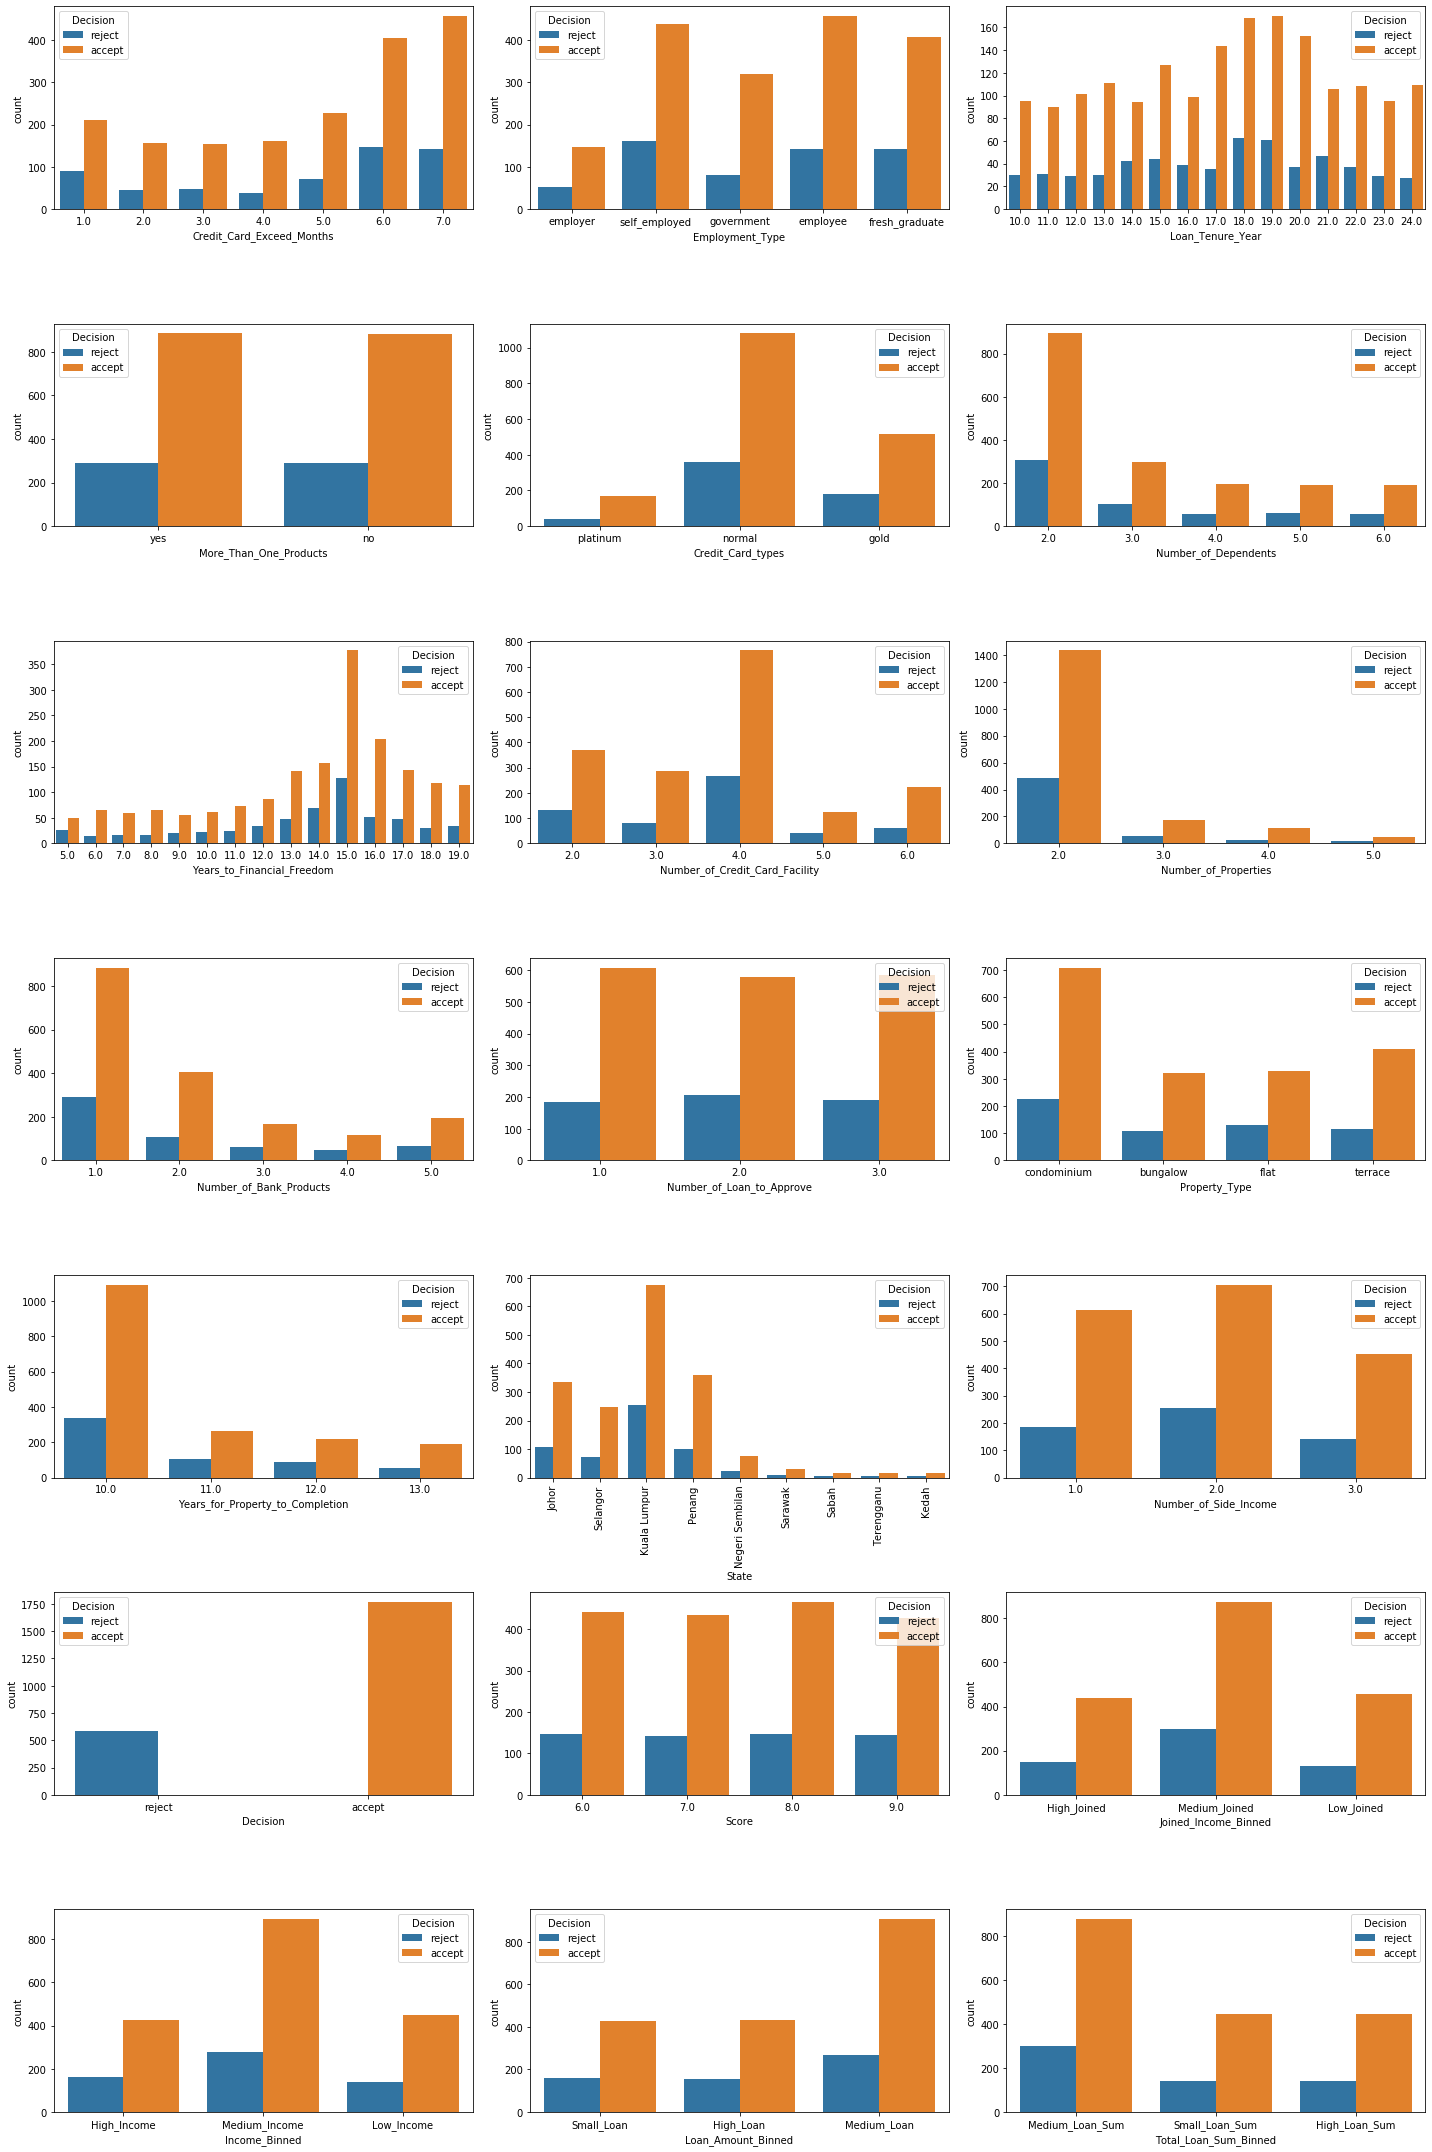

In [38]:
fig,axes = plt.subplots(7,3,figsize=(20,30))
for idx,cat in enumerate(categorical):
    row,col = divmod(idx,3)
    if (cat=='State'):
        ax = sns.countplot(x=cat,data=filledDf,hue='Decision',ax=axes[row,col],orient='v')
        plt.setp(ax.get_xticklabels(), rotation=90)
    else:
        sns.countplot(x=cat,data=filledDf,hue='Decision',ax=axes[row,col],orient='v')

plt.tight_layout()
#plt.show()

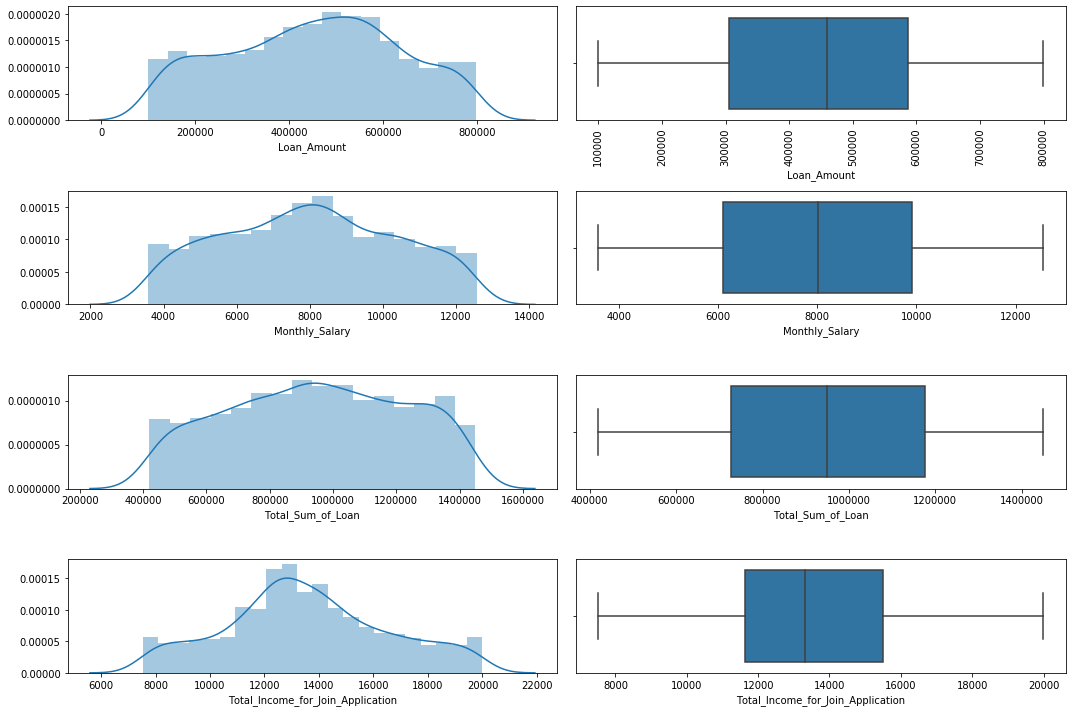

In [39]:
fig,axes = plt.subplots(4,2,figsize=(15,10))
for idx,con in enumerate(continuous):
    if (con=='Loan_Amount'):
        sns.distplot(filledDf[con],ax=axes[idx,0]);
        ax = sns.boxplot(x=con,data=filledDf,ax=axes[idx,1])
        plt.setp(ax.get_xticklabels(), rotation=90)
    else:
        sns.distplot(filledDf[con],ax=axes[idx,0]);
        sns.boxplot(x=con,data=filledDf,ax=axes[idx,1])

plt.tight_layout()

### What types of properties do couples of different income group go for?

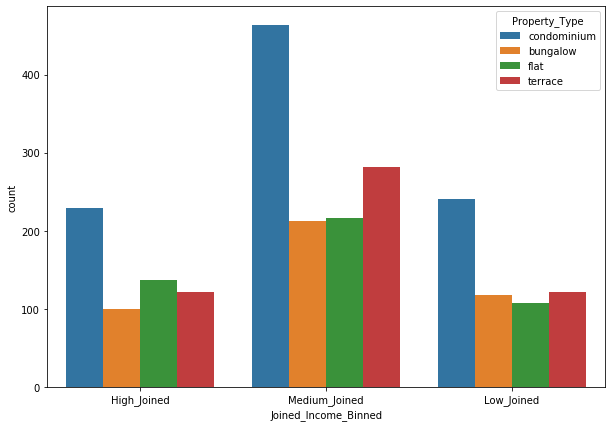

In [40]:
#edaDf.groupby(['Joined_Income_Binned','Property_Type']).size().to_frame(name='counts')
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(data=filledDf,x='Joined_Income_Binned',hue='Property_Type',ax=ax)

### Which type of employee are most likely accepted by the bank for the loan?

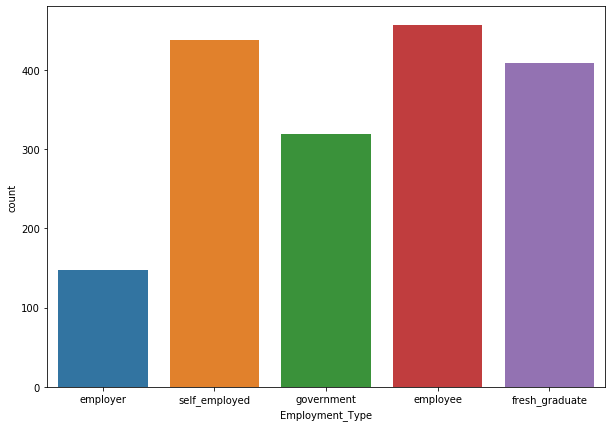

In [41]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(data=filledDf[filledDf['Decision']=='accept'],x='Employment_Type',ax=ax)

### Which are the distributions of high,medium and low income in different states?

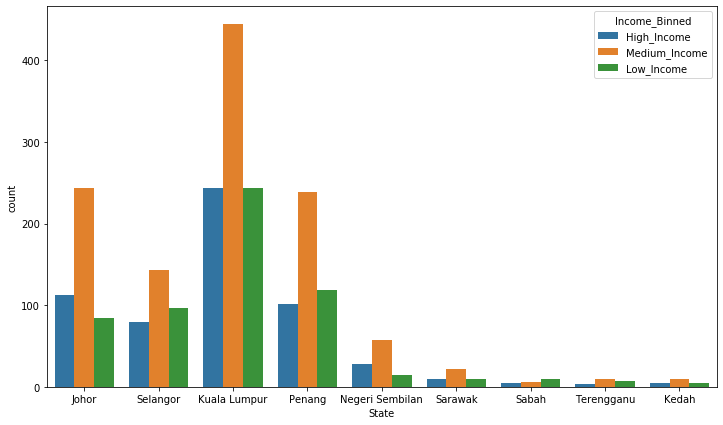

In [42]:
#edaDf.groupby(['State','Income_Binned']).size().to_frame(name='counts')
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(data=filledDf,x='State',hue='Income_Binned',ax=ax)

### Which state has the highest number of loan amount on average? 

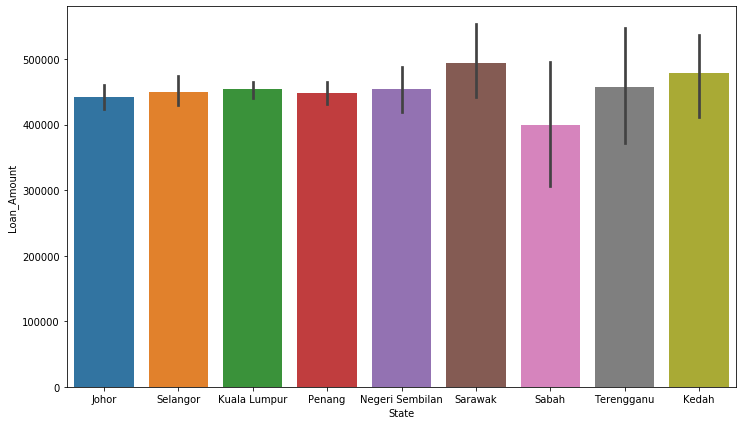

In [43]:
fig, ax = plt.subplots(figsize=(12,7))
sns.barplot(data=filledDf,x='State',y='Loan_Amount',ax=ax)

### Which state has the highest number of loan approval and rejects?

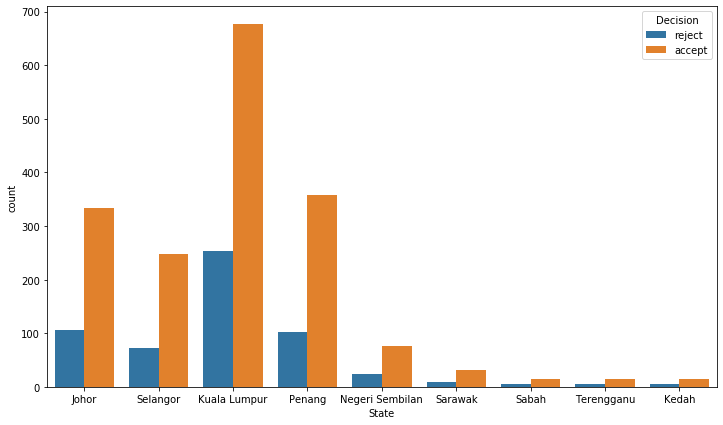

In [44]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(data=filledDf,x='State',hue='Decision',ax=ax)

### Do people with higher credit score who apply for higher loan amount get more approvals?

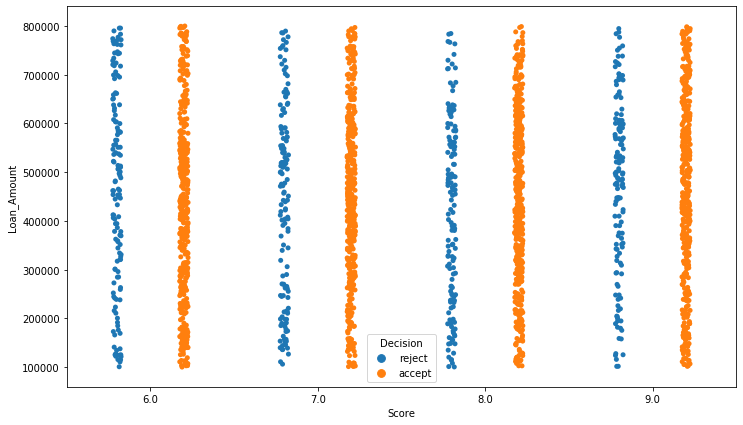

In [45]:
fig, ax = plt.subplots(figsize=(12,7))
sns.stripplot(data=filledDf,x='Score',y='Loan_Amount',jitter=0.05,hue='Decision',dodge=True,ax=ax)

### What is the relationship between joined income and sum of loan taken?

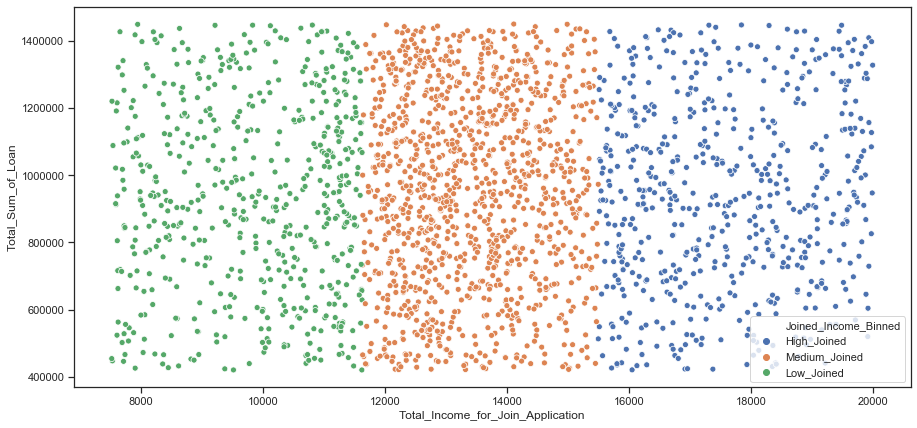

In [46]:
sns.set(style="ticks")
fig, ax = plt.subplots(figsize=(15,7))
ax = sns.scatterplot(x="Total_Income_for_Join_Application", y="Total_Sum_of_Loan",hue='Joined_Income_Binned', data=filledDf)

<br> The middle classes seems to have more instances of loan application.

### What is the relationship between monthly salary and joined income?

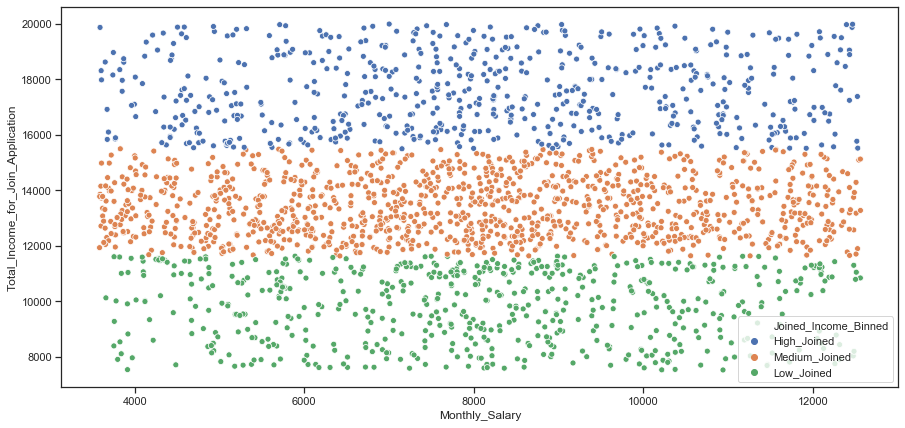

In [47]:
sns.set(style="ticks")
fig, ax = plt.subplots(figsize=(15,7))
ax = sns.scatterplot(x="Monthly_Salary", y="Total_Income_for_Join_Application",hue='Joined_Income_Binned', data=filledDf)

<br> Regardless of monthly salary, total joined income from the middle class seems to be the most.

## Correlation Analysis

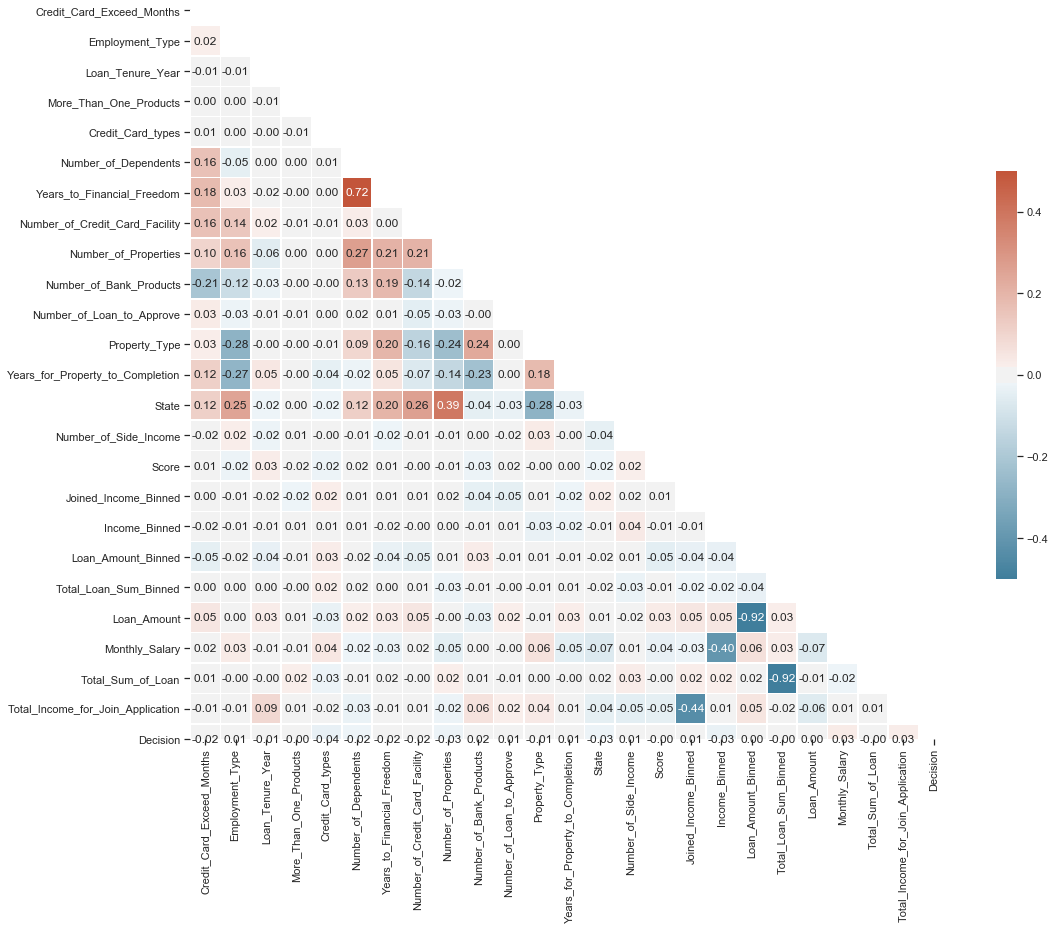

In [48]:
corr = encodedDf.corr()

# generating a 
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(17, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,vmin=-0.5,vmax=.5, center=0, annot=True,fmt=".2f",
            square=True, linewidths=.5, cbar_kws={"shrink": .5},ax=ax)

# Feature Selection

In [49]:
!pip install Boruta

In [50]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import MinMaxScaler

In [51]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [52]:
X = encodedDf.drop('Decision',1)
y = encodedDf.Decision
colnames = X.columns

### Boruta

In [53]:
rf = RandomForestClassifier(n_jobs=1, class_weight="balanced", max_depth=5,random_state=42)
feat_selector = BorutaPy(rf, n_estimators="auto", random_state=1)

feat_selector.fit(X.values,y.values.ravel())
colnames = X.columns

boruta_score = ranking(list(map(float, feat_selector.ranking_)),colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features','Score'])
boruta_score = boruta_score.sort_values("Score", ascending=False)

In [54]:
# your codes here...
print('---------Top 10----------')
display(boruta_score.head(10))

print('---------Bottom 10 ----------')
boruta_score.tail(10)

---------Top 10----------


,Features,Score
20,Loan_Amount,1.00
21,Monthly_Salary,0.96
23,Total_Income_for_Join_Application,0.91
22,Total_Sum_of_Loan,0.87
6,Years_to_Financial_Freedom,0.83
2,Loan_Tenure_Year,0.83
0,Credit_Card_Exceed_Months,0.74
13,State,0.70
4,Credit_Card_types,0.65
12,Years_for_Property_to_Completion,0.61


---------Bottom 10 ----------


,Features,Score
5,Number_of_Dependents,0.39
17,Income_Binned,0.35
18,Loan_Amount_Binned,0.35
15,Score,0.26
14,Number_of_Side_Income,0.22
8,Number_of_Properties,0.17
10,Number_of_Loan_to_Approve,0.17
16,Joined_Income_Binned,0.09
19,Total_Loan_Sum_Binned,0.04
3,More_Than_One_Products,0.00


Text(0.5, 1, 'Boruta Top Related Features in Ascending Orders')

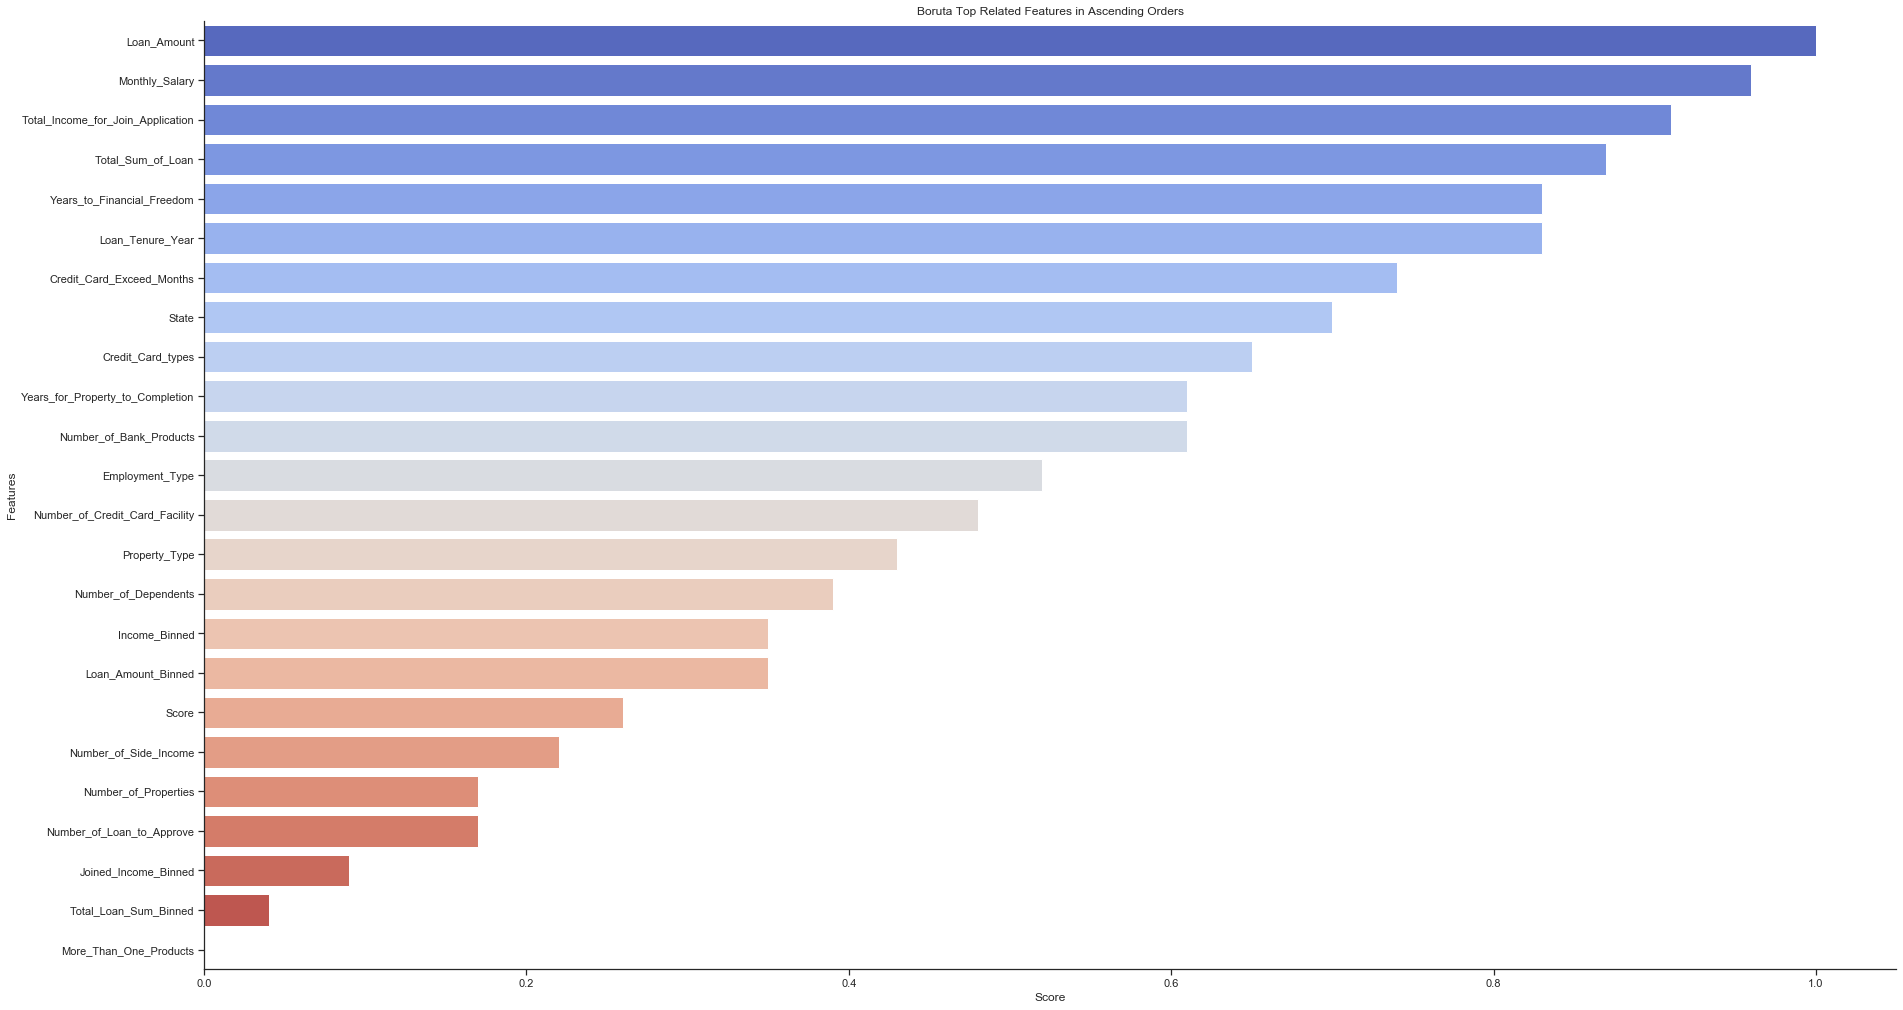

In [55]:
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[0:26], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("Boruta Top Related Features in Ascending Orders")

### RFE

In [56]:
rf = RandomForestClassifier(n_jobs=1, class_weight="balanced", max_depth=5, n_estimators=100)
rf.fit(X,y)
rfe = RFECV(rf, min_features_to_select=1, cv=3)

rfe.fit(X,y)

rfe_score = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
rfe_score = pd.DataFrame(list(rfe_score.items()), columns=['Features', 'Score'])
rfe_score = rfe_score.sort_values("Score", ascending = False)

Text(0.5, 1, 'RFE Top Related Features in Ascending Order')

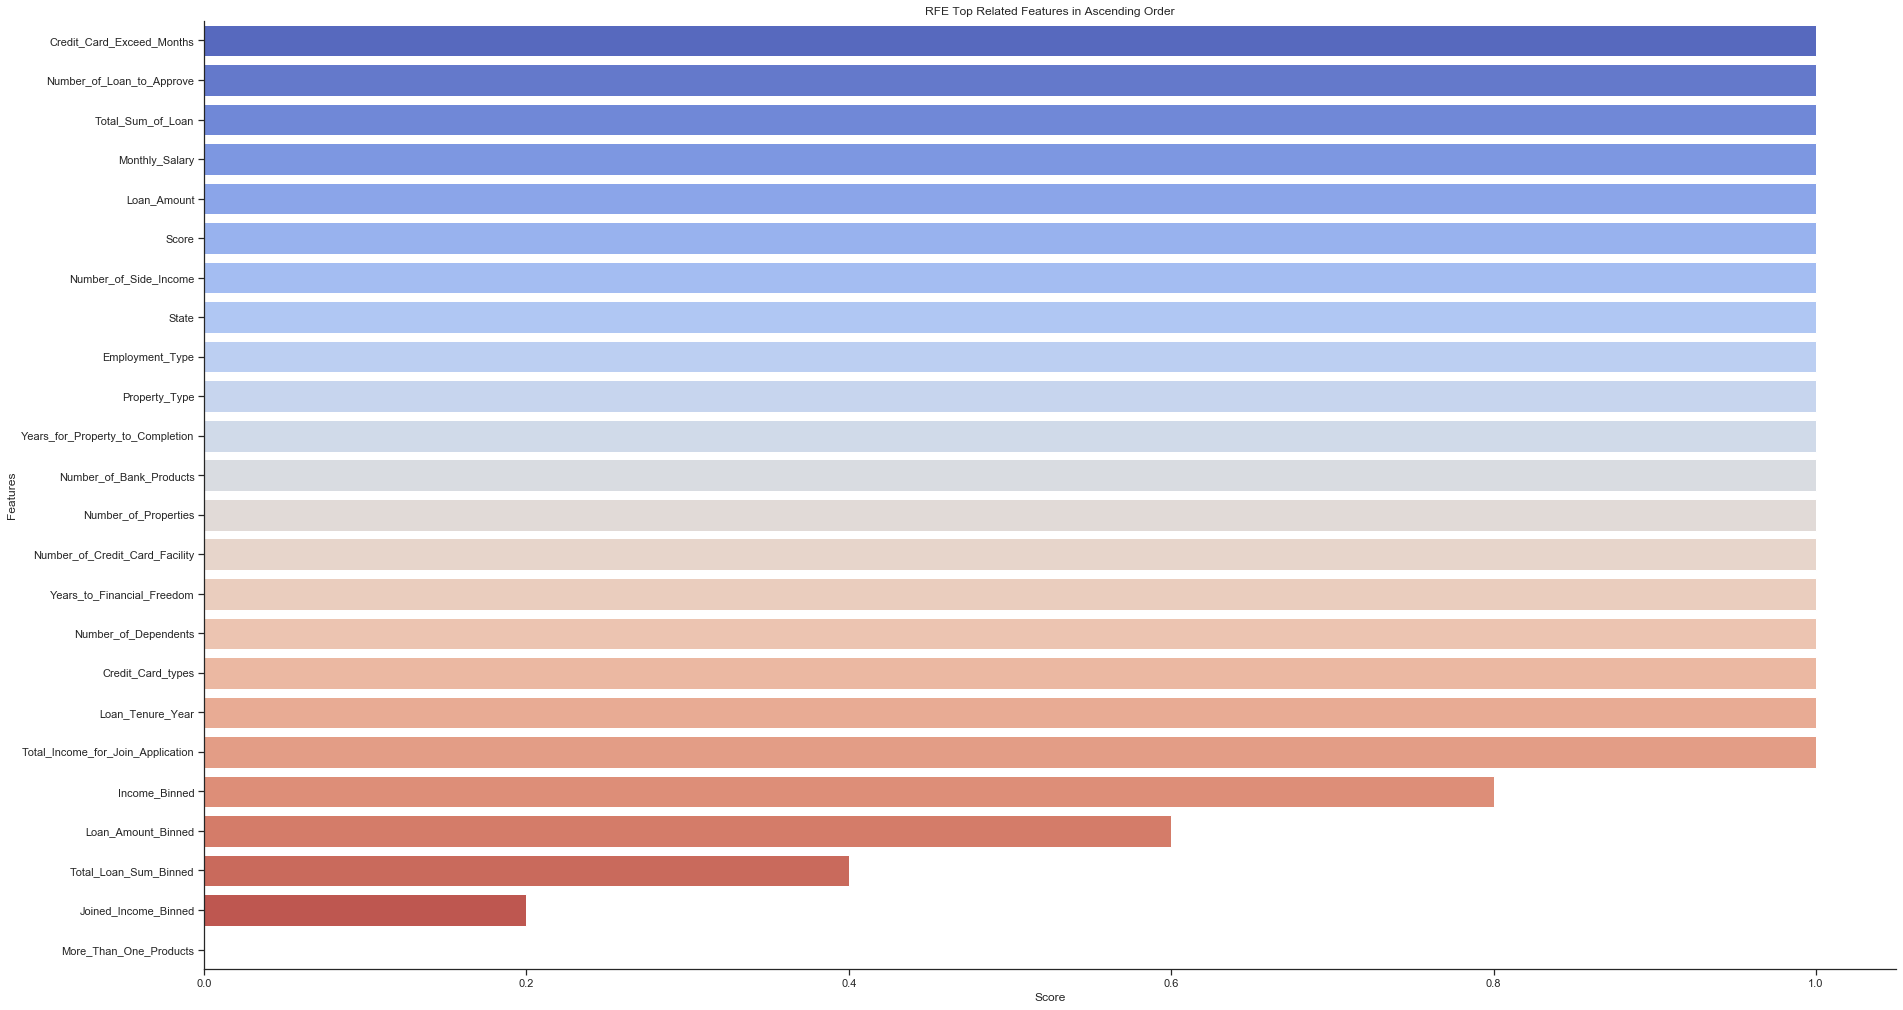

In [57]:
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = rfe_score[0:26], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("RFE Top Related Features in Ascending Order")

In [58]:
print('---------Top 10----------')
display(rfe_score.head(10))

print('---------Bottom 10----------')
rfe_score.tail(10)

---------Top 10----------


,Features,Score
0,Credit_Card_Exceed_Months,1.0
10,Number_of_Loan_to_Approve,1.0
22,Total_Sum_of_Loan,1.0
21,Monthly_Salary,1.0
20,Loan_Amount,1.0
15,Score,1.0
14,Number_of_Side_Income,1.0
13,State,1.0
1,Employment_Type,1.0
11,Property_Type,1.0


---------Bottom 10----------


,Features,Score
6,Years_to_Financial_Freedom,1.0
5,Number_of_Dependents,1.0
4,Credit_Card_types,1.0
2,Loan_Tenure_Year,1.0
23,Total_Income_for_Join_Application,1.0
17,Income_Binned,0.8
18,Loan_Amount_Binned,0.6
19,Total_Loan_Sum_Binned,0.4
16,Joined_Income_Binned,0.2
3,More_Than_One_Products,0.0


### Selecting Top Features

In [59]:
print('Top Features for Boruta are : \n')
topFeaturesBoruta = boruta_score.loc[boruta_score['Score'] > 0.6,'Features'].values
for i,feature in enumerate(topFeaturesBoruta):
  print(i+1,feature)

Top Features for Boruta are : 

1 Loan_Amount
2 Monthly_Salary
3 Total_Income_for_Join_Application
4 Total_Sum_of_Loan
5 Years_to_Financial_Freedom
6 Loan_Tenure_Year
7 Credit_Card_Exceed_Months
8 State
9 Credit_Card_types
10 Years_for_Property_to_Completion
11 Number_of_Bank_Products


In [60]:
print('Top Features for RFE are : \n')
topFeaturesRFE = rfe_score.loc[rfe_score['Score'] > 0.6,'Features'].values
for i,feature in enumerate(topFeaturesRFE):
  print(i+1,feature)

Top Features for RFE are : 

1 Credit_Card_Exceed_Months
2 Number_of_Loan_to_Approve
3 Total_Sum_of_Loan
4 Monthly_Salary
5 Loan_Amount
6 Score
7 Number_of_Side_Income
8 State
9 Employment_Type
10 Property_Type
11 Years_for_Property_to_Completion
12 Number_of_Bank_Products
13 Number_of_Properties
14 Number_of_Credit_Card_Facility
15 Years_to_Financial_Freedom
16 Number_of_Dependents
17 Credit_Card_types
18 Loan_Tenure_Year
19 Total_Income_for_Join_Application
20 Income_Binned


In [61]:
topMatchedFeatures = []
for i in topFeaturesBoruta:
    for j in topFeaturesRFE:
        if i==j:
            topMatchedFeatures.append(i)

# Printing Matched Features
print('Matched Features are : \n')
for i,feature in enumerate(topMatchedFeatures):
  print(i+1,feature)

Matched Features are : 

1 Loan_Amount
2 Monthly_Salary
3 Total_Income_for_Join_Application
4 Total_Sum_of_Loan
5 Years_to_Financial_Freedom
6 Loan_Tenure_Year
7 Credit_Card_Exceed_Months
8 State
9 Credit_Card_types
10 Years_for_Property_to_Completion
11 Number_of_Bank_Products


### Preparing Top Matched Features Dataframe

In [62]:
encodedTopFeaturesDf = encodedDf[topMatchedFeatures].copy()
decisionCol = encodedDf['Decision'].copy()
decisionDf = decisionCol.to_frame()
encodedTopFeaturesDf = pd.concat([encodedTopFeaturesDf,decisionDf], axis=1)
encodedTopFeaturesDf.head(5)

,Loan_Amount,Monthly_Salary,Total_Income_for_Join_Application,Total_Sum_of_Loan,Years_to_Financial_Freedom,Loan_Tenure_Year,Credit_Card_Exceed_Months,State,Credit_Card_types,Years_for_Property_to_Completion,Number_of_Bank_Products,Decision
0,265419.0,12262.0,16025.0,853141.0,0,6,0,0,2,0,0,1
1,605505.0,9251.0,17082.0,882901.0,10,9,0,0,1,0,0,0
2,223871.0,4919.0,12613.0,540489.0,0,5,0,0,1,0,1,1
3,490216.0,4459.0,10952.0,536727.0,0,10,0,0,1,0,0,0
4,292728.0,5628.0,12694.0,774695.0,0,4,0,0,1,0,0,1


Since we are going to smote the dataset later on, lets normalize the encoded top features dataset.

In [63]:
temp = encodedTopFeaturesDf[continuous]
columns = encodedTopFeaturesDf[continuous].columns

a = MinMaxScaler()
x_scaled = a.fit_transform(temp)
x_scaled = pd.DataFrame(x_scaled, columns = columns)
x_scaled = x_scaled.round(2)
#Forming the scaled dataframe
encodedTopFeaturesDf[continuous] = x_scaled
encodedTopFeaturesDf.head(5)

,Loan_Amount,Monthly_Salary,Total_Income_for_Join_Application,Total_Sum_of_Loan,Years_to_Financial_Freedom,Loan_Tenure_Year,Credit_Card_Exceed_Months,State,Credit_Card_types,Years_for_Property_to_Completion,Number_of_Bank_Products,Decision
0,0.24,0.97,0.68,0.42,0,6,0,0,2,0,0,1
1,0.72,0.63,0.77,0.45,10,9,0,0,1,0,0,0
2,0.18,0.15,0.41,0.12,0,5,0,0,1,0,1,1
3,0.56,0.10,0.27,0.11,0,10,0,0,1,0,0,0
4,0.28,0.23,0.41,0.34,0,4,0,0,1,0,0,1


# Dataset Resampling

## Smote

Before **SMOTE**, lets decode the topMatchedFeatures so that we can use SMOTENC.

In [64]:
topFeaturesCategorical = encodedTopFeaturesDf.columns.intersection(categorical)
topFeaturesCategorical = topFeaturesCategorical.drop(labels=['Decision'])

topFeaturesDf = encodedTopFeaturesDf.copy()
topFeaturesDf[topFeaturesCategorical] = encodedTopFeaturesDf[topFeaturesCategorical].apply(lambda x: d[x.name].inverse_transform(x))
topFeaturesDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 12 columns):
Loan_Amount                          2350 non-null float64
Monthly_Salary                       2350 non-null float64
Total_Income_for_Join_Application    2350 non-null float64
Total_Sum_of_Loan                    2350 non-null float64
Years_to_Financial_Freedom           2350 non-null object
Loan_Tenure_Year                     2350 non-null object
Credit_Card_Exceed_Months            2350 non-null object
State                                2350 non-null object
Credit_Card_types                    2350 non-null object
Years_for_Property_to_Completion     2350 non-null object
Number_of_Bank_Products              2350 non-null object
Decision                             2350 non-null int32
dtypes: float64(4), int32(1), object(7)
memory usage: 211.3+ KB


In [65]:
from imblearn.over_sampling import SMOTENC

In [66]:
X = topFeaturesDf.drop('Decision',1)
y = topFeaturesDf.Decision

In [67]:
smtNC = SMOTENC(categorical_features=[topFeaturesDf.dtypes==object],sampling_strategy="not majority", random_state=42, k_neighbors=5)

In [68]:
X_res, y_res = smtNC.fit_resample(X, y)

In [69]:
X_res = pd.DataFrame(X_res,columns = X.columns)
y_res = pd.DataFrame(y_res)
smotedDf = pd.concat([X_res,y_res], axis=1)
smotedDf.columns = [*smotedDf.columns[:-1], 'Decision']
smotedDf.head(10)

,Loan_Amount,Monthly_Salary,Total_Income_for_Join_Application,Total_Sum_of_Loan,Years_to_Financial_Freedom,Loan_Tenure_Year,Credit_Card_Exceed_Months,State,Credit_Card_types,Years_for_Property_to_Completion,Number_of_Bank_Products,Decision
0,0.24,0.97,0.68,0.42,5,16,1,Johor,platinum,10,1,1
1,0.72,0.63,0.77,0.45,15,19,1,Johor,normal,10,1,0
2,0.18,0.15,0.41,0.12,5,15,1,Johor,normal,10,2,1
3,0.56,0.10,0.27,0.11,5,20,1,Johor,normal,10,1,0
4,0.28,0.23,0.41,0.34,5,14,1,Johor,normal,10,1,1
5,0.14,0.86,0.71,0.90,5,20,1,Johor,normal,12,1,1
6,0.18,0.47,0.29,0.19,5,19,1,Johor,gold,10,1,0
7,0.81,0.76,0.00,0.65,5,21,1,Johor,normal,10,1,1
8,0.02,0.94,0.43,0.13,5,24,1,Johor,normal,10,2,0
9,0.08,0.47,0.87,0.71,5,12,1,Johor,gold,10,1,1


Lets convert all the numerical types back to its original float64 datatype

In [70]:
for con in continuous:
  smotedDf[con] = smotedDf[con].astype(float)

Lets encode the dataframe with categorical features back to encoded form.

In [71]:
encodedSmotedDf = smotedDf.copy()
encodedSmotedDf[topFeaturesCategorical] = smotedDf[topFeaturesCategorical].apply(lambda x: d[x.name].fit_transform(x))
encodedSmotedDf.head(5)

,Loan_Amount,Monthly_Salary,Total_Income_for_Join_Application,Total_Sum_of_Loan,Years_to_Financial_Freedom,Loan_Tenure_Year,Credit_Card_Exceed_Months,State,Credit_Card_types,Years_for_Property_to_Completion,Number_of_Bank_Products,Decision
0,0.24,0.97,0.68,0.42,0,6,0,0,2,0,0,1
1,0.72,0.63,0.77,0.45,10,9,0,0,1,0,0,0
2,0.18,0.15,0.41,0.12,0,5,0,0,1,0,1,1
3,0.56,0.10,0.27,0.11,0,10,0,0,1,0,0,0
4,0.28,0.23,0.41,0.34,0,4,0,0,1,0,0,1


# Modelling

Dataframe used here will be encodedTopFeaturesDf and encodedTopFeaturesDf, both of these dataframes are encoded.

In [72]:
encodedTopFeaturesDf.head(5)

,Loan_Amount,Monthly_Salary,Total_Income_for_Join_Application,Total_Sum_of_Loan,Years_to_Financial_Freedom,Loan_Tenure_Year,Credit_Card_Exceed_Months,State,Credit_Card_types,Years_for_Property_to_Completion,Number_of_Bank_Products,Decision
0,0.24,0.97,0.68,0.42,0,6,0,0,2,0,0,1
1,0.72,0.63,0.77,0.45,10,9,0,0,1,0,0,0
2,0.18,0.15,0.41,0.12,0,5,0,0,1,0,1,1
3,0.56,0.10,0.27,0.11,0,10,0,0,1,0,0,0
4,0.28,0.23,0.41,0.34,0,4,0,0,1,0,0,1


In [73]:
encodedSmotedDf.head(5)

,Loan_Amount,Monthly_Salary,Total_Income_for_Join_Application,Total_Sum_of_Loan,Years_to_Financial_Freedom,Loan_Tenure_Year,Credit_Card_Exceed_Months,State,Credit_Card_types,Years_for_Property_to_Completion,Number_of_Bank_Products,Decision
0,0.24,0.97,0.68,0.42,0,6,0,0,2,0,0,1
1,0.72,0.63,0.77,0.45,10,9,0,0,1,0,0,0
2,0.18,0.15,0.41,0.12,0,5,0,0,1,0,1,1
3,0.56,0.10,0.27,0.11,0,10,0,0,1,0,0,0
4,0.28,0.23,0.41,0.34,0,4,0,0,1,0,0,1


In [74]:
temp = encodedSmotedDf.to_numpy()
temp[:,11]

array([1., 0., 1., ..., 1., 1., 1.])

## Splitting train test

In [75]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

### Non-Smote-d Dataframe Split

In [76]:
ns_X = encodedTopFeaturesDf.drop('Decision',1)
ns_y = encodedTopFeaturesDf.Decision
ns_X_train,ns_X_test,ns_y_train,ns_y_test = train_test_split(ns_X,ns_y,test_size=0.3,random_state =42)

### Smote-d Dataframe Split

In [77]:
################# Splitting into Train -Test Data #######
s_X = encodedSmotedDf.drop('Decision',1)
s_y = encodedSmotedDf.Decision
s_X_train,s_X_test,s_y_train,s_y_test = train_test_split(s_X,s_y,test_size=0.3,random_state =42)

In [78]:
s_X_train.shape

(2476, 11)

## Training

In [79]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [80]:
# Evaluation Lists
s_fprList = []
s_tprList = []

ns_fprList = []
ns_tprList = []

### Decision Tree Classifier

In [81]:
def treeClassifier(X_train,X_test,y_train,y_test,criterion,depth,leaf):
  tree_clf = DecisionTreeClassifier(criterion=criterion, max_depth=depth, min_samples_leaf =leaf,random_state=42)
  tree_clf.fit(X_train,y_train)
  y_pred = tree_clf.predict(X_test)
  print("Accuracy on training set : {:.3f}".format(tree_clf.score(X_train, y_train)))
  print("Accuracy on test set     : {:.3f}".format(tree_clf.score(X_test, y_test)))
  confusion_majority=confusion_matrix(y_test, y_pred)

  print('Mjority classifier Confusion Matrix\n', confusion_majority)

  print('**********************')
  print('Mjority TN = ', confusion_majority[0][0])
  print('Mjority FP = ', confusion_majority[0][1])
  print('Mjority FN = ', confusion_majority[1][0])
  print('Mjority TP = ', confusion_majority[1][1])
  print('**********************')

  print('Precision= {:.3f}'.format(precision_score(y_test, y_pred)))
  print('Recall= {:.3f}'. format(recall_score(y_test, y_pred)))
  print('F1= {:.3f}'. format(f1_score(y_test, y_pred)))
  print('Accuracy= {:.3f}'. format(accuracy_score(y_test, y_pred)))

  prob_DT = tree_clf.predict_proba(X_test)
  prob_DT = prob_DT[:,1]

  auc_DT = roc_auc_score(y_test,prob_DT)
  print("AUC : %.2f " % auc_DT)
  fpr_DT, tpr_DT, thresholds_DT = roc_curve(y_test, prob_DT)

  return fpr_DT,tpr_DT

#### Non-Smote-d

In [82]:
fpr,tpr = treeClassifier(ns_X_train,ns_X_test,ns_y_train,ns_y_test,'gini',16,2)
ns_fprList.append(fpr)
ns_tprList.append(tpr)

Accuracy on training set : 0.934
Accuracy on test set     : 0.662
Mjority classifier Confusion Matrix
 [[425 115]
 [123  42]]
**********************
Mjority TN =  425
Mjority FP =  115
Mjority FN =  123
Mjority TP =  42
**********************
Precision= 0.268
Recall= 0.255
F1= 0.261
Accuracy= 0.662
AUC : 0.52 


#### Smote-d

In [83]:
fpr,tpr = treeClassifier(s_X_train,s_X_test,s_y_train,s_y_test,'gini',19,1)
s_fprList.append(fpr)
s_tprList.append(tpr)

Accuracy on training set : 0.987
Accuracy on test set     : 0.652
Mjority classifier Confusion Matrix
 [[344 203]
 [167 348]]
**********************
Mjority TN =  344
Mjority FP =  203
Mjority FN =  167
Mjority TP =  348
**********************
Precision= 0.632
Recall= 0.676
F1= 0.653
Accuracy= 0.652
AUC : 0.65 


### Random Forest Classifier 

In [84]:
def forestClassifier(X_train,X_test,y_train,y_test,criterion,depth,leaf,estimators):
  rf = RandomForestClassifier(criterion=criterion,max_depth=depth,min_samples_leaf=leaf,n_estimators=estimators,random_state=42)
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)
  print("Accuracy on training set : {:.3f}".format(rf.score(X_train, y_train)))
  print("Accuracy on test set     : {:.3f}".format(rf.score(X_test, y_test)))
  confusion_majority=confusion_matrix(y_test, y_pred)

  print('Mjority classifier Confusion Matrix\n', confusion_majority)

  print('**********************')
  print('Mjority TN = ', confusion_majority[0][0])
  print('Mjority FP = ', confusion_majority[0][1])
  print('Mjority FN = ', confusion_majority[1][0])
  print('Mjority TP = ', confusion_majority[1][1])
  print('**********************')

  print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
  print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
  print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
  print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))



  prob_rf = rf.predict_proba(X_test)
  prob_rf = prob_rf[:,1]

  auc_rf = roc_auc_score(y_test,prob_rf)
  print("AUC : %.2f " % auc_rf)
  fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, prob_rf)
  return fpr_rf,tpr_rf

#### Non-Smote-d

In [85]:
fpr,tpr =forestClassifier(ns_X_train,ns_X_test,ns_y_train,ns_y_test,'gini',16,2,140)
ns_fprList.append(fpr)
ns_tprList.append(tpr)

Accuracy on training set : 0.959
Accuracy on test set     : 0.760
Mjority classifier Confusion Matrix
 [[534   6]
 [163   2]]
**********************
Mjority TN =  534
Mjority FP =  6
Mjority FN =  163
Mjority TP =  2
**********************
Precision= 0.25
Recall= 0.01
F1= 0.02
Accuracy= 0.76
AUC : 0.52 


#### Smote-d

In [86]:
fpr,tpr = forestClassifier(s_X_train,s_X_test,s_y_train,s_y_test,'gini',19,1,100)
s_fprList.append(fpr)
s_tprList.append(tpr)

Accuracy on training set : 1.000
Accuracy on test set     : 0.744
Mjority classifier Confusion Matrix
 [[403 144]
 [128 387]]
**********************
Mjority TN =  403
Mjority FP =  144
Mjority FN =  128
Mjority TP =  387
**********************
Precision= 0.73
Recall= 0.75
F1= 0.74
Accuracy= 0.74
AUC : 0.82 


### Support Vector Machine

In [87]:
def svmClassifier(X_train,X_test,y_train,y_test,C,gamma,kernel):
  svc = SVC( C=C,gamma=gamma,kernel=kernel,probability=True,random_state=42)
  svc.fit(X_train, y_train)
  y_pred = svc.predict(X_test)
  print("Accuracy on training set : {:.3f}".format(svc.score(X_train, y_train)))
  print("Accuracy on test set     : {:.3f}".format(svc.score(X_test, y_test)))
  confusion_majority=confusion_matrix(y_test, y_pred)

  print('Mjority classifier Confusion Matrix\n', confusion_majority)

  print('**********************')
  print('Mjority TN = ', confusion_majority[0][0])
  print('Mjority FP = ', confusion_majority[0][1])
  print('Mjority FN = ', confusion_majority[1][0])
  print('Mjority TP = ', confusion_majority[1][1])
  print('**********************')

  print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
  print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
  print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
  print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

  prob_svc = svc.predict_proba(X_test)
  prob_svc = prob_svc[:,1]

  auc_svc = roc_auc_score(y_test,prob_svc)
  print("AUC : %.2f " % auc_svc)
  fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, prob_svc)
  return fpr_svc,tpr_svc

#### Non-Smote-d

In [88]:
fpr,tpr = svmClassifier(ns_X_train,ns_X_test,ns_y_train,ns_y_test,0.7,1.0,'rbf')
ns_fprList.append(fpr)
ns_tprList.append(tpr)

Accuracy on training set : 0.782
Accuracy on test set     : 0.762
Mjority classifier Confusion Matrix
 [[535   5]
 [163   2]]
**********************
Mjority TN =  535
Mjority FP =  5
Mjority FN =  163
Mjority TP =  2
**********************
Precision= 0.29
Recall= 0.01
F1= 0.02
Accuracy= 0.76
AUC : 0.49 


#### Smote-d

In [ ]:
fpr,tpr = svmClassifier(s_X_train,s_X_test,s_y_train,s_y_test,0.7,1.0,'rbf')
s_fprList.append(fpr)
s_tprList.append(tpr)

In [ ]:
def logisticRegressionClassifier(X_train,X_test,y_train,y_test,C,max_iter):
  lr = LogisticRegression(random_state=42,C=C,max_iter=max_iter)
  lr.fit(X_train, y_train)
  y_pred = lr.predict(X_test)
  print("Accuracy on training set : {:.3f}".format(lr.score(X_train, y_train)))
  print("Accuracy on test set     : {:.3f}".format(lr.score(X_test, y_test)))
  confusion_majority=confusion_matrix(y_test, y_pred)

  print('Mjority classifier Confusion Matrix\n', confusion_majority)

  print('**********************')
  print('Mjority TN = ', confusion_majority[0][0])
  print('Mjority FP = ', confusion_majority[0][1])
  print('Mjority FN = ', confusion_majority[1][0])
  print('Mjority TP = ', confusion_majority[1][1])
  print('**********************')

  print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
  print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
  print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
  print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

  prob_lr = lr.predict_proba(X_test)
  prob_lr = prob_lr[:,1]

  auc_lr = roc_auc_score(y_test,prob_lr)
  print("AUC : %.2f " % auc_lr)
  fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, prob_lr) 
  return fpr_lr,tpr_lr

In [ ]:
fpr,tpr = logisticRegressionClassifier(ns_X_train,ns_X_test,ns_y_train,ns_y_test,0.1,100)
ns_fprList.append(fpr)
ns_tprList.append(tpr)

In [ ]:
fpr,tpr = logisticRegressionClassifier(s_X_train,s_X_test,s_y_train,s_y_test,0.1,100)
s_fprList.append(fpr)
s_tprList.append(tpr)

### Naive Bayes

In [ ]:
def naiveBayesClassifier(X_train,X_test,y_train,y_test):
  nb = GaussianNB()
  nb.fit(X_train, y_train)
  y_pred = nb.predict(X_test)
  print("Accuracy on test set     : {:.3f}".format(nb.score(X_test, y_test)))
  print("Accuracy on test set     : {:.3f}".format(nb.score(X_test, y_test)))
  confusion_majority=confusion_matrix(y_test, y_pred)

  print('Mjority classifier Confusion Matrix\n', confusion_majority)

  print('**********************')
  print('Mjority TN = ', confusion_majority[0][0])
  print('Mjority FP = ', confusion_majority[0][1])
  print('Mjority FN = ', confusion_majority[1][0])
  print('Mjority TP = ', confusion_majority[1][1])
  print('**********************')

  print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
  print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
  print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
  print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

  prob_NB = nb.predict_proba(X_test)
  prob_NB = prob_NB[:,1]

  auc_NB= roc_auc_score(y_test, prob_NB)
  print('AUC : %.2f' % auc_NB)

  fpr_NB, tpr_NB, thresholds_NB = roc_curve(y_test, prob_NB) 
  return fpr_NB, tpr_NB

#### Non-Smote-d

In [ ]:
fpr,tpr = naiveBayesClassifier(ns_X_train,ns_X_test,ns_y_train,ns_y_test)
ns_fprList.append(fpr)
ns_tprList.append(tpr)

#### Smote-d

In [ ]:
fpr,tpr = naiveBayesClassifier(s_X_train,s_X_test,s_y_train,s_y_test)
s_fprList.append(fpr)
s_tprList.append(tpr)

### MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
def mlpClassifier(X_train,X_test,y_train,y_test):
  mlp = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=42)
  mlp.fit(X_train, y_train)
  y_pred = mlp.predict(X_test)

  print("Accuracy on test set     : {:.3f}".format(mlp.score(X_test, y_test)))
  print("Accuracy on test set     : {:.3f}".format(mlp.score(X_test, y_test)))
  confusion_majority=confusion_matrix(y_test, y_pred)

  print('Mjority classifier Confusion Matrix\n', confusion_majority)

  print('**********************')
  print('Mjority TN = ', confusion_majority[0][0])
  print('Mjority FP = ', confusion_majority[0][1])
  print('Mjority FN = ', confusion_majority[1][0])
  print('Mjority TP = ', confusion_majority[1][1])
  print('**********************')

  print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
  print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
  print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
  print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

  prob_mlp = mlp.predict_proba(X_test)
  prob_mlp = prob_mlp[:,1]

  auc_mlp= roc_auc_score(y_test, prob_mlp)
  print('AUC : %.2f' % auc_mlp)

  fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, prob_mlp) 
  return fpr_mlp, tpr_mlp

#### Non-Smote-d

In [ ]:
fpr,tpr = mlpClassifier(ns_X_train,ns_X_test,ns_y_train,ns_y_test)
ns_fprList.append(fpr)
ns_tprList.append(tpr)

#### Smote-d

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(60, input_dim=60, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [ ]:
fpr,tpr = mlpClassifier(s_X_train,s_X_test,s_y_train,s_y_test)
s_fprList.append(fpr)
s_tprList.append(tpr)

### Clustering

#### K-Mode

In [ ]:
!pip install kmodes

In [ ]:
from kmodes.kmodes import KModes

In [ ]:
kModeDf = encodedSmotedDf.drop(columns=continuous)

In [ ]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(kModeDf)

clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = kModeDf.columns

In [ ]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(kModeDf)
    cost.append(kmode.cost_)
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [ ]:
kModeDf = encodedSmotedDf.drop(columns=continuous).reset_index()
kModeClustersDf = pd.DataFrame(fitClusters_cao)
kModeClustersDf.columns = ['kMode_Clusters']
encodedKModeDf = pd.concat([kModeDf, kModeClustersDf], axis = 1).reset_index()
encodedKModeDf = encodedKModeDf.drop(['index', 'level_0'], axis = 1)
encodedKModeDf.head(5)

#### K-Means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X = encodedSmotedDf[continuous].copy()
X.head(5)

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

kMeansDf = encodedSmotedDf[continuous].reset_index()
kMeansClustersDf = pd.DataFrame(y_kmeans)
kMeansClustersDf.columns = ['kMeans_Clusters']
encodedKMeansDf = pd.concat([kMeansDf, kMeansClustersDf], axis = 1).reset_index()
encodedKMeansDf = encodedKMeansDf.drop(['index', 'level_0'], axis = 1)
encodedKMeansDf.head(5)

## Model Tuning

Since the **Smote-d dataset** performs better, lets use it to tune the parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
def model_tuning(estimator, param_grid, X_train, y_train):
  grid = GridSearchCV(estimator,param_grid,cv=5,n_jobs=-1)
  grid.fit(X_train, y_train)
  print('\n\n******************************')
  print('The best parameters are %s with CV score of %0.2f' 
        % (grid.best_params_,grid.best_score_))
  print('****************************')

### Decision Tree Classifier

In [ ]:
param_grid = {
              'max_depth' : np.arange(1,20,2),
              'min_samples_leaf' : np.arange(1,10,1),
              'criterion':['gini','entropy']
             }
model_tuning(DecisionTreeClassifier(random_state=42),
              param_grid,
              s_X_train,
              s_y_train)

### Random Forest Classifier

In [ ]:
param_grid = {
                'n_estimators' : np.arange(100,150,5),
             }
model_tuning(RandomForestClassifier(criterion='gini', max_depth=19, min_samples_leaf = 1,random_state=42),
              param_grid,
              s_X_train,
              s_y_train)

### Support Vector Machine

In [ ]:
param_grid = {
              'C':[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1],
              'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
              'kernel':['rbf','linear']
             }
model_tuning( SVC(random_state=42),
              param_grid,
              s_X_train,
              s_y_train
            )

### Multi-level perceptron Classifier

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(400,3),(500,3),(600,3),(700,3)],
    #'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.05],
    'learning_rate': ['constant'] ,
    'momentum' : [0.1,0.2,0.3,0.4,0.5]
}

model_tuning(MLPClassifier(activation='relu',max_iter=300,random_state=42),
             param_grid,
             s_X_train,
             s_y_train)



## Visualization

In [ ]:
def modelComparison(fprList,tprList,labelList,colorList,title):
  plt.figure(figsize=(15,10))
  for i in range(len(labelList)):
    plt.plot(fprList[i], tprList[i] , color=colorList[i], label=labelList[i])
  plt.plot([0, 1], [0, 1], color='black', linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.suptitle(title, fontsize=30)
  plt.legend()


#### Non Smote-d

In [ ]:
modelComparison(ns_fprList,ns_tprList,['DT','RFC','SVM','NB','MLP'],['orange','blue','red','yellow','green'],'Non-Smote-d (ROC) Curve')

#### Smote-d

In [ ]:
modelComparison(s_fprList,s_tprList,['DT','RFC','SVM','NB','MLP'],['orange','blue','red','yellow','green'],'Smote-d (ROC) Curve')